### ANN

In [38]:
import pandas as pd
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer

#glorot_normal, glorot_uniform, he_niform, he_normal, random_uniform, random_normal are different kernal_initializers
classifier.add(Dense(units = 10, kernel_initializer='he_uniform', activation='relu', input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'he_uniform', activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                120       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [40]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 100, epochs = 100, 
                               callbacks = [stop_early])

Epoch 1/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6536 - accuracy: 0.6477 - val_loss: 0.6196 - val_accuracy: 0.7247
Epoch 2/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5850 - accuracy: 0.7595 - val_loss: 0.5694 - val_accuracy: 0.7747
Epoch 3/100
54/54 [==============================] - 0s 1ms/step - loss: 0.5410 - accuracy: 0.7886 - val_loss: 0.5330 - val_accuracy: 0.7948
Epoch 4/100
54/54 [==============================] - 0s 1ms/step - loss: 0.5086 - accuracy: 0.8001 - val_loss: 0.5069 - val_accuracy: 0.8020
Epoch 5/100
54/54 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.8031 - val_loss: 0.4879 - val_accuracy: 0.8046
Epoch 6/100
54/54 [==============================] - 0s 1ms/step - loss: 0.4664 - accuracy: 0.8065 - val_loss: 0.4741 - val_accuracy: 0.8061
Epoch 7/100
54/54 [==============================] - 0s 2ms/step - loss: 0.4540 - accuracy: 0.8089 - val_loss: 0.4658 - val_accuracy: 0.8076
Epoch 8/100
5

54/54 [==============================] - 0s 987us/step - loss: 0.3259 - accuracy: 0.8647 - val_loss: 0.3578 - val_accuracy: 0.8607
Epoch 59/100
54/54 [==============================] - 0s 979us/step - loss: 0.3257 - accuracy: 0.8664 - val_loss: 0.3576 - val_accuracy: 0.8599
Epoch 60/100
54/54 [==============================] - 0s 1ms/step - loss: 0.3255 - accuracy: 0.8666 - val_loss: 0.3578 - val_accuracy: 0.8610
Epoch 61/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3257 - accuracy: 0.8655 - val_loss: 0.3577 - val_accuracy: 0.8603
Epoch 62/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3255 - accuracy: 0.8664 - val_loss: 0.3577 - val_accuracy: 0.8607
Epoch 63/100
54/54 [==============================] - 0s 1ms/step - loss: 0.3247 - accuracy: 0.8673 - val_loss: 0.3588 - val_accuracy: 0.8588
Epoch 64/100
54/54 [==============================] - 0s 976us/step - loss: 0.3247 - accuracy: 0.8645 - val_loss: 0.3572 - val_accuracy: 0.8607
Epoch 65/100


In [41]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


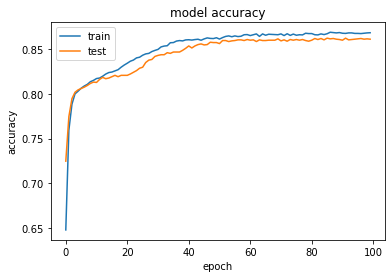

In [43]:
# list all data in history
import matplotlib.pyplot as plt
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

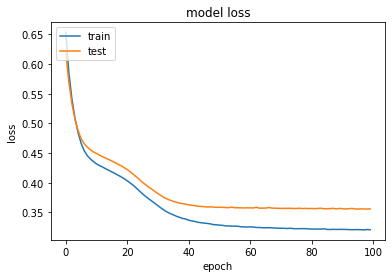

In [44]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [46]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1505,   90],
       [ 187,  218]], dtype=int64)

In [47]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.8615

### Keras_Tuner

## classification

In [1]:
import pandas as pd
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [2]:
X_train.shape

(8000, 11)

In [3]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy'])
    return model

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project1',
    project_name='Churn4')

In [5]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train, y_train,
             epochs = 100,
             validation_data=(X_test, y_test), callbacks=[stop_early])

Trial 5 Complete [00h 00m 48s]
val_accuracy: 0.7975000143051147

Best val_accuracy So Far: 0.7975000143051147
Total elapsed time: 00h 03m 18s
INFO:tensorflow:Oracle triggered exit


In [6]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps

In [7]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

200/200 [==============================] - 1s 3ms/step - loss: 0.6164 - accuracy: 0.7941 - val_loss: 0.5226 - val_accuracy: 0.7969
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5270 - accuracy: 0.7958 - val_loss: 0.5128 - val_accuracy: 0.7969
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5161 - accuracy: 0.7958 - val_loss: 0.5040 - val_accuracy: 0.7969
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.50

200/200 [==============================] - 0s 2ms/step - loss: 0.5063 - accuracy: 0.7958 - val_loss: 0.5047 - val_accuracy: 0.7969
Epoch 52/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5064 - accuracy: 0.7958 - val_loss: 0.5047 - val_accuracy: 0.7969
Epoch 53/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5064 - accuracy: 0.7958 - val_loss: 0.5047 - val_accuracy: 0.7969
Epoch 54/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5065 - accuracy: 0.7958 - val_loss: 0.5047 - val_accuracy: 0.7969
Epoch 55/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5065 - accuracy: 0.7958 - val_loss: 0.5047 - val_accuracy: 0.7969
Epoch 56/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5064 - accuracy: 0.7958 - val_loss: 0.5047 - val_accuracy: 0.7969
Epoch 57/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5064 - accuracy: 0.7958 - val_loss: 0.5047 - val_accuracy: 0.7969
Epoch

In [8]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=0.2)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

200/200 [==============================] - 1s 3ms/step - loss: 0.6008 - accuracy: 0.7839 - val_loss: 0.5389 - val_accuracy: 0.7969


In [9]:
eval_result = hypermodel.evaluate(X_test, y_test)
print("[test loss, test accuracy]:", eval_result)

63/63 [==============================] - 0s 1ms/step - loss: 0.5343 - accuracy: 0.7975
[test loss, test accuracy]: [0.5343124270439148, 0.7975000143051147]


In [10]:
y_pred = hypermodel.predict(X_test)
y_pred = (y_pred > 0.5)

In [11]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [12]:
cm

array([[1595,    0],
       [ 405,    0]], dtype=int64)

In [13]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [14]:
score

0.7975

### Regression

In [15]:
df=pd.read_csv('Real_Combine.csv')

In [19]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [21]:
tuner = RandomSearch(
    build_model,
    objective='val_mean_absolute_error',
    max_trials=5,
    executions_per_trial=3,
    directory='project',
    project_name='Air Quality Index')

In [22]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner.search(X_train, y_train,
             epochs = 100,
             validation_data=(X_test, y_test), callbacks=[stop_early])

Trial 5 Complete [00h 00m 14s]
val_mean_absolute_error: 44.198317209879555

Best val_mean_absolute_error So Far: 44.198317209879555
Total elapsed time: 00h 01m 58s
INFO:tensorflow:Oracle triggered exit


In [23]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps

In [24]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

val_acc_per_epoch = history.history['mean_absolute_error']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

20/20 [==============================] - 0s 10ms/step - loss: 74.1690 - mean_absolute_error: 74.1690 - val_loss: nan - val_mean_absolute_error: nan
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 68.8351 - mean_absolute_error: 68.8351 - val_loss: nan - val_mean_absolute_error: nan
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 68.8869 - mean_absolute_error: 68.8869 - val_loss: nan - val_mean_absolute_error: nan
Epoch 4/100
20/20 [===========

Epoch 48/100
20/20 [==============================] - 0s 3ms/step - loss: 41.5569 - mean_absolute_error: 41.5569 - val_loss: nan - val_mean_absolute_error: nan
Epoch 49/100
20/20 [==============================] - 0s 3ms/step - loss: 42.2107 - mean_absolute_error: 42.2107 - val_loss: nan - val_mean_absolute_error: nan
Epoch 50/100
20/20 [==============================] - 0s 3ms/step - loss: 42.7075 - mean_absolute_error: 42.7075 - val_loss: nan - val_mean_absolute_error: nan
Epoch 51/100
20/20 [==============================] - 0s 3ms/step - loss: 42.0856 - mean_absolute_error: 42.0856 - val_loss: nan - val_mean_absolute_error: nan
Epoch 52/100
20/20 [==============================] - 0s 3ms/step - loss: 44.2444 - mean_absolute_error: 44.2444 - val_loss: nan - val_mean_absolute_error: nan
Epoch 53/100
20/20 [==============================] - 0s 3ms/step - loss: 43.3191 - mean_absolute_error: 43.3191 - val_loss: nan - val_mean_absolute_error: nan
Epoch 54/100
20/20 [====================

20/20 [==============================] - 0s 4ms/step - loss: 41.2311 - mean_absolute_error: 41.2311 - val_loss: nan - val_mean_absolute_error: nan
Epoch 100/100
20/20 [==============================] - 0s 4ms/step - loss: 40.0735 - mean_absolute_error: 40.0735 - val_loss: nan - val_mean_absolute_error: nan
Best epoch: 1


In [25]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=0.2)


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

20/20 [==============================] - 0s 10ms/step - loss: 74.7733 - mean_absolute_error: 74.7733 - val_loss: nan - val_mean_absolute_error: nan


In [26]:
eval_result = hypermodel.evaluate(X_test, y_test)
print("[test loss, test accuracy]:", eval_result)

11/11 [==============================] - 0s 1ms/step - loss: 65.0115 - mean_absolute_error: 65.0115
[test loss, test accuracy]: [65.01148986816406, 65.01148986816406]


In [36]:
from sklearn.metrics import mean_squared_error
y_pred = hypermodel.predict(X_test)
final_mse = mean_squared_error(y_test, y_pred)
final_mse

7230.21100954946